# plot-points.ipynb

This notebook is used to load a CSV containing coordinates of points (slice, row, column) and add them to napari as a Points layer. This will allow the points to be edited and saved again to a CSV file.

## Import packages

In [1]:
# Standard library imports
from pathlib import Path
# Third-party imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Local imports
import helpers

## Load CSVs as Points layer

In [2]:
def plot_points(shot_str, csv_dir):
    color_dict = {
        'gus' : 'green',
        'brian' : 'blue',
        'adriana' : 'red',
    }
    fig, ax = plt.subplots(figsize=(6, 4), dpi=150)
    # Create list of CSV files that contain the string shot_str in the filename
    csv_paths = [
        path for path in csv_dir.glob('*.csv') if str(shot_str) in str(path).lower()
    ]
    for csv_path in csv_paths:
        layer_name = csv_path.stem
        user = layer_name[layer_name.rfind('-') + 1 :]
        color = color_dict[user]
        pts_df = pd.read_csv(csv_path, index_col=0)
        ax.scatter(
            pts_df['axis-0'].to_numpy(), 
            pts_df['axis-1'].to_numpy(),
            s=2,
            color=color,
            label=user,
        )
        ax.set_xlabel('Image number')
        ax.set_ylabel('Distance from top of image (pixels)')
    ax.legend()

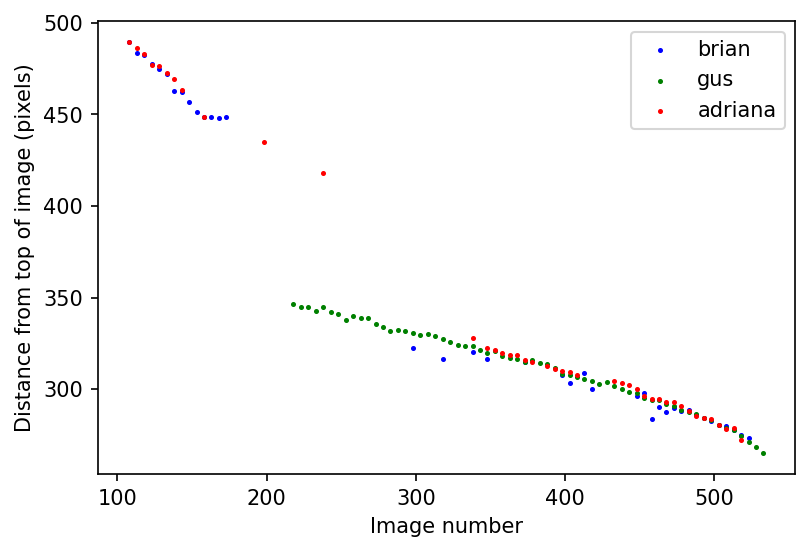

In [3]:
plot_points('shot6', Path('points/2022-04-14'))